<font color='#614D40'>
<h5>Note:</h5><br>
1. utils.py file contains custom build functions
<ul>
  <li> build_random_model</li>
  <li>plot_confusion_matrix</li>
  <li>get_text_responsecoding</li>
    <li>get_gv_fea_dict</li>
    <li>get_gv_feature</li>
    <li>predict_and_plot_confusion_matrix</li>
    <li>report_log_loss</li>
    
</ul>
2. To plot confusion matrix for model, pass 'show_plot = True' predict_and_plot_confusion_matrix function
<ul>
  <li> e.g. predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf, show_plot = True)</li>
</ul>
</font>

<h2><font color='#40B5C4'> Importing Libraries </font></h2>

In [1]:
#basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

#regax and stopwords
import re
from nltk.corpus import stopwords

#train test split
from sklearn.model_selection import train_test_split

# performance matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

#Custom class
from utils import *

#text to vector
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

#stacking
from scipy.sparse import hstack

#ML algo
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


<h2><font color='#40B5C4'> Loading dataset </font></h2>

In [2]:
data = pd.read_csv('file1.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data = data.drop('Unnamed: 0', axis=1)
print('Features : ', data.columns.values)

In [3]:
# data = pd.read_csv('final_features2.csv')
# print('Number of data points : ', data.shape[0])
# print('Number of features : ', data.shape[1])
# print('Features : ', data.columns.values)
# data = data.drop(['Unnamed: 0', 'id'], axis=1)
# print('Features : ', data.columns.values)

Number of data points :  404290
Number of features :  31
Features :  ['Unnamed: 0' 'id' 'question1' 'question2' 'is_duplicate' 'cwc_min'
 'cwc_max' 'csc_min' 'csc_max' 'ctc_min' 'ctc_max' 'last_word_eq'
 'first_word_eq' 'abs_len_diff' 'mean_len' 'token_set_ratio'
 'token_sort_ratio' 'fuzz_ratio' 'fuzz_partial_ratio'
 'longest_substr_ratio' 'freq_qid1' 'freq_qid2' 'q1len' 'q2len'
 'q1_n_words' 'q2_n_words' 'word_Common' 'word_Total' 'word_share'
 'freq_q1+q2' 'freq_q1-q2']
Features :  ['question1' 'question2' 'is_duplicate' 'cwc_min' 'cwc_max' 'csc_min'
 'csc_max' 'ctc_min' 'ctc_max' 'last_word_eq' 'first_word_eq'
 'abs_len_diff' 'mean_len' 'token_set_ratio' 'token_sort_ratio'
 'fuzz_ratio' 'fuzz_partial_ratio' 'longest_substr_ratio' 'freq_qid1'
 'freq_qid2' 'q1len' 'q2len' 'q1_n_words' 'q2_n_words' 'word_Common'
 'word_Total' 'word_share' 'freq_q1+q2' 'freq_q1-q2']


In [4]:
len(data[data.isnull().any(axis=1)])

20

In [5]:
data = data.dropna(axis=0)
len(data[data.isnull().any(axis=1)])

0

In [6]:
y_true = data['is_duplicate'].values
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

In [7]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 258732
Number of data points in test data: 80854
Number of data points in cross validation data: 64684


<h2><font color='#40B5C4'> Building random model(base model) </font></h2>

Log loss on Cross Validation Data using Random Model 0.8899718933008248
Log loss on Test Data using Random Model 0.8842555449453418
-------------------- Confusion matrix --------------------


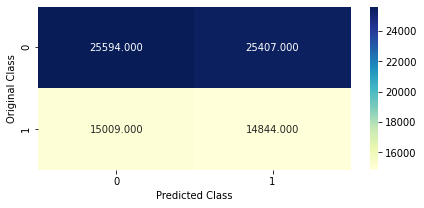

-------------------- Precision matrix (Columm Sum=1) --------------------


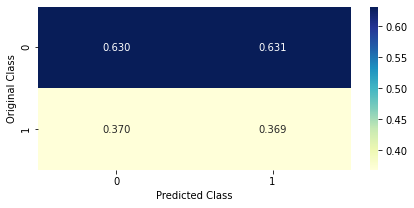

-------------------- Recall matrix (Row sum=1) --------------------


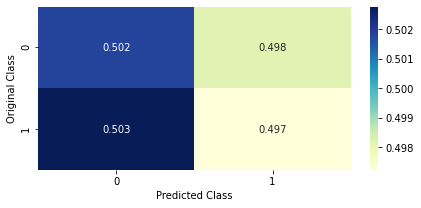

In [8]:
predicted_y = build_random_model(test_df, cv_df, y_cv, y_test)
plot_confusion_matrix(y_test, predicted_y)

<h2><font color='#40B5C4'> Data preprocessing </font></h2>

<h4><font color='#BBA036'>Response coding for feature "question1"</font></h4>

In [9]:
#response coding of text features
train_question1_feature_responseCoding  = get_text_responsecoding(train_df, "question1", "is_duplicate", 2)
test_question1_feature_responseCoding  = get_text_responsecoding(test_df, "question1", "is_duplicate", 2)
cv_question1_feature_responseCoding  = get_text_responsecoding(cv_df, "question1", "is_duplicate", 2)

In [10]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_question1_feature_responseCoding = (train_question1_feature_responseCoding.T/train_question1_feature_responseCoding.sum(axis=1)).T
test_question1_feature_responseCoding = (test_question1_feature_responseCoding.T/test_question1_feature_responseCoding.sum(axis=1)).T
cv_question1_feature_responseCoding = (cv_question1_feature_responseCoding.T/cv_question1_feature_responseCoding.sum(axis=1)).T

<h4><font color='#BBA036'>Response coding for feature "question2"</font></h4>

In [11]:
#response coding of text features
train_question2_feature_responseCoding  = get_text_responsecoding(train_df, "question2", "is_duplicate", 2)
test_question2_feature_responseCoding  = get_text_responsecoding(test_df, "question2", "is_duplicate", 2)
cv_question2_feature_responseCoding  = get_text_responsecoding(cv_df, "question2", "is_duplicate", 2)

In [12]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  
train_question2_feature_responseCoding = (train_question2_feature_responseCoding.T/train_question2_feature_responseCoding.sum(axis=1)).T
test_question2_feature_responseCoding = (test_question2_feature_responseCoding.T/test_question2_feature_responseCoding.sum(axis=1)).T
cv_question2_feature_responseCoding = (cv_question2_feature_responseCoding.T/cv_question2_feature_responseCoding.sum(axis=1)).T

<h4><font color='#BBA036'>TfIdf(or on hot encoded vector) for feature "question1"</font></h4>

In [13]:
#tfidf text to vector
vectorizer = TfidfVectorizer(max_features=1000)
train_question1_feature_tfidf = vectorizer.fit_transform(train_df['question1'])

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
tfidf_fea_q1_counts = train_question1_feature_tfidf.sum(axis=0).A1


<h4><font color='#BBA036'>Normalizing one hot encoded feature "TEXT" </font></h4>

In [14]:
# don't forget to normalize every feature
train_question1_feature_onehotCoding = normalize(train_question1_feature_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
test_question1_feature_onehotCoding = vectorizer.transform(test_df['question1'])
# don't forget to normalize every feature
test_question1_feature_onehotCoding = normalize(test_question1_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_question1_feature_onehotCoding = vectorizer.transform(cv_df['question1'])
# don't forget to normalize every feature
cv_question1_feature_onehotCoding = normalize(cv_question1_feature_onehotCoding, axis=0)

<h4><font color='#BBA036'>TfIdf(or on hot encoded vector) for feature "question2"</font></h4>

In [15]:
#tfidf text to vector
vectorizer = TfidfVectorizer(max_features=1000)
train_question2_feature_tfidf = vectorizer.fit_transform(train_df['question2'])

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
tfidf_fea_q2_counts = train_question2_feature_tfidf.sum(axis=0).A1


<h4><font color='#BBA036'>Normalizing one hot encoded feature "TEXT" </font></h4>

In [16]:
# don't forget to normalize every feature
train_question2_feature_onehotCoding = normalize(train_question2_feature_tfidf, axis=0)

# we use the same vectorizer that was trained on train data
test_question2_feature_onehotCoding = vectorizer.transform(test_df['question2'])
# don't forget to normalize every feature
test_question2_feature_onehotCoding = normalize(test_question2_feature_onehotCoding, axis=0)

# we use the same vectorizer that was trained on train data
cv_question2_feature_onehotCoding = vectorizer.transform(cv_df['question2'])
# don't forget to normalize every feature
cv_question2_feature_onehotCoding = normalize(cv_question2_feature_onehotCoding, axis=0)

<h1><center><font color='#BBA036'>Stacking the three types of features</font></center></h1>

In [17]:
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

train_x_onehotCoding = hstack((train_question1_feature_onehotCoding,train_question2_feature_onehotCoding)).tocsr()
test_x_onehotCoding = hstack((test_question1_feature_onehotCoding,test_question2_feature_onehotCoding)).tocsr()
cv_x_onehotCoding = hstack((cv_question1_feature_onehotCoding,cv_question2_feature_onehotCoding)).tocsr()

train_y = np.array(list(train_df['is_duplicate']))
test_y = np.array(list(test_df['is_duplicate']))
cv_y = np.array(list(cv_df['is_duplicate']))


train_x_responseCoding = np.hstack((train_question1_feature_responseCoding, train_question2_feature_responseCoding))
test_x_responseCoding = np.hstack((test_question1_feature_responseCoding, test_question2_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_question1_feature_responseCoding, cv_question2_feature_responseCoding))


<h2><font color='#40B5C4'>Machine Learning Models </font></h2>

In [18]:
#list to store some records for final summary
Model_name = []
train_losses_list = []
cv_losses_list = []
test_losses_list = []
misclassified_percentage= []

<h3><font color='#235DA3'>Naive Bayas (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-05
Log Loss : 0.6157848036906082
for alpha = 0.0001
Log Loss : 0.6157935979239848
for alpha = 0.001
Log Loss : 0.6158044884271658
for alpha = 0.1
Log Loss : 0.6158802524792248
for alpha = 1
Log Loss : 0.6162396579766746
for alpha = 10
Log Loss : 0.6183831228698912
for alpha = 100
Log Loss : 0.6457730245610245
for alpha = 1000
Log Loss : 0.6752937425399655


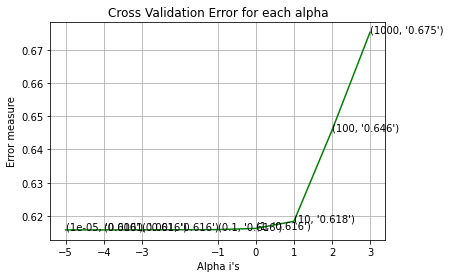

For values of best alpha =  1e-05 The train log loss is: 0.5786693770925494
For values of best alpha =  1e-05 The cross validation log loss is: 0.6157848036906082
For values of best alpha =  1e-05 The test log loss is: 0.6017751948679843


In [19]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
naive_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",naive_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
naive_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",naive_cv_loss)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
naive_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",naive_te_loss)

#For Summary
Model_name.append("MultinomialNB-OHE")
train_losses_list.append(naive_tr_loss)
cv_losses_list.append(naive_cv_loss)
test_losses_list.append(naive_te_loss)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [20]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
missclassified_p =  np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0]
misclassified_percentage.append(missclassified_p*100)
print("Number of missclassified point :",missclassified_p)
# plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

Log Loss : 0.6157848036906082
Number of missclassified point : 0.2945086883928019


<h3><font color='#235DA3'>Naive Bayas (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-05
Log Loss : 0.778614756919626
for alpha = 0.0001
Log Loss : 0.7786147569836229
for alpha = 0.001
Log Loss : 0.7786147575495614
for alpha = 0.1
Log Loss : 0.7786148212597677
for alpha = 1
Log Loss : 0.7786154001547153
for alpha = 10
Log Loss : 0.7786211576928644
for alpha = 100
Log Loss : 0.7786752145803336
for alpha = 1000
Log Loss : 0.7270196238487338


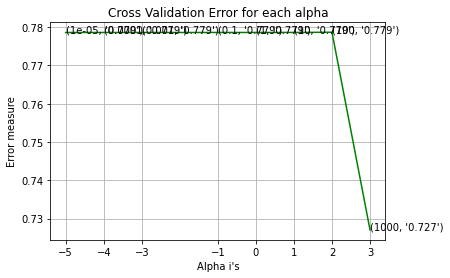

For values of best alpha =  1000 The train log loss is: 0.6369455821693812
For values of best alpha =  1000 The cross validation log loss is: 0.7270196238487338
For values of best alpha =  1000 The test log loss is: 0.6940712178434021


In [21]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_responseCoding)
naive_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",naive_tr_loss)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
naive_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",naive_cv_loss)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
naive_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",naive_te_loss)

#For Summary
Model_name.append("MultinomialNB-RC")
train_losses_list.append(naive_tr_loss)
cv_losses_list.append(naive_cv_loss)
test_losses_list.append(naive_te_loss)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [22]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
missclassified_p =  np.count_nonzero((sig_clf.predict(cv_x_responseCoding)- cv_y))/cv_y.shape[0]
misclassified_percentage.append(missclassified_p*100)
print("Number of missclassified point :",missclassified_p)
# plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_responseCoding))

Log Loss : 0.7270196238487338
Number of missclassified point : 0.3692103147609919


<h3><font color='#235DA3'>K Nearest Neighbour Classification(with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [23]:
# alpha = [5, 11, 15, 21, 31, 41, 51, 99]
# cv_log_error_array = []
# for i in alpha:
#     print("for alpha =", i)
#     clf = KNeighborsClassifier(n_neighbors=i)
#     clf.fit(train_x_onehotCoding, train_y)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(train_x_onehotCoding, train_y)
#     sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
#     cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#     # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# fig, ax = plt.subplots()
# ax.plot(alpha, cv_log_error_array,c='g')
# for i, txt in enumerate(np.round(cv_log_error_array,3)):
#     ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
# plt.grid()
# plt.title("Cross Validation Error for each alpha")
# plt.xlabel("Alpha i's")
# plt.ylabel("Error measure")
# plt.show()


# best_alpha = np.argmin(cv_log_error_array)
# clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
# clf.fit(train_x_onehotCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_onehotCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_onehotCoding)
# knn_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",knn_tr_loss)
# predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
# knn_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",knn_cv_loss)
# predict_y = sig_clf.predict_proba(test_x_onehotCoding)
# knn_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",knn_te_loss)

# #For Summary
# Model_name.append("KNN-OHE")
# train_losses_list.append(knn_tr_loss)
# cv_losses_list.append(knn_cv_loss)
# test_losses_list.append(knn_te_loss)

In [24]:
# clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
# missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf, show_plot = True)
# misclassified_percentage.append(missclassified_p*100)

<h3><font color='#235DA3'>K Nearest Neighbour Classification(with response coding)</font></h3>

In [25]:
# alpha = [5, 11, 15, 21, 31, 41, 51, 99]
# cv_log_error_array = []
# for i in alpha:
#     print("for alpha =", i)
#     clf = KNeighborsClassifier(n_neighbors=i)
#     clf.fit(train_x_responseCoding, train_y)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(train_x_responseCoding, train_y)
#     sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
#     cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#     # to avoid rounding error while multiplying probabilites we use log-probability estimates
#     print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# fig, ax = plt.subplots()
# ax.plot(alpha, cv_log_error_array,c='g')
# for i, txt in enumerate(np.round(cv_log_error_array,3)):
#     ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
# plt.grid()
# plt.title("Cross Validation Error for each alpha")
# plt.xlabel("Alpha i's")
# plt.ylabel("Error measure")
# plt.show()


# best_alpha = np.argmin(cv_log_error_array)
# clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
# clf.fit(train_x_responseCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_responseCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_responseCoding)
# knn_tr_loss = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",knn_tr_loss)
# predict_y = sig_clf.predict_proba(cv_x_responseCoding)
# knn_cv_loss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",knn_cv_loss)
# predict_y = sig_clf.predict_proba(test_x_responseCoding)
# knn_te_loss = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",knn_te_loss)

# #For Summary
# Model_name.append("KNN-RC")
# train_losses_list.append(knn_tr_loss)
# cv_losses_list.append(knn_cv_loss)
# test_losses_list.append(knn_te_loss)

In [26]:
# clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
# missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
# misclassified_percentage.append(missclassified_p*100)


<h3><font color='#235DA3'>Logistic Regression (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.6098588156671446
for alpha = 1e-05
Log Loss : 0.6135883754036204
for alpha = 0.0001
Log Loss : 0.6152522683112815
for alpha = 0.001
Log Loss : 0.6155117998592976
for alpha = 0.01
Log Loss : 0.6225043651616758
for alpha = 0.1
Log Loss : 0.7889856205631199
for alpha = 1
Log Loss : 0.8541184951659371
for alpha = 10
Log Loss : 0.8632676813438007
for alpha = 100
Log Loss : 0.8648067027938916


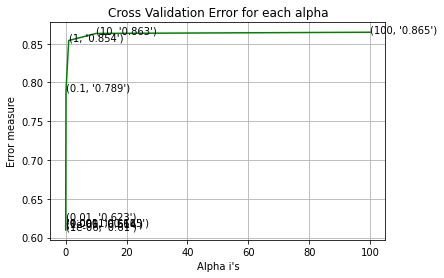

For values of best alpha =  1e-06 The train log loss is: 0.5523301091132249
For values of best alpha =  1e-06 The cross validation log loss is: 0.6098588156671446
For values of best alpha =  1e-06 The test log loss is: 0.5900728655074022


In [27]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-OHE")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [28]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.6098588156671446
Number of mis-classified points : 0.2824809844783872


<h3><font color='#235DA3'>Logistic Regression (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.7782605857061878
for alpha = 1e-05
Log Loss : 0.7786553004007315
for alpha = 0.0001
Log Loss : 0.7787642721615089
for alpha = 0.001
Log Loss : 0.7787450936301684
for alpha = 0.01
Log Loss : 0.7787512756263699
for alpha = 0.1
Log Loss : 0.7787756909811796
for alpha = 1
Log Loss : 0.7766339142829835
for alpha = 10
Log Loss : 0.7780582117352544
for alpha = 100
Log Loss : 0.778092813338399


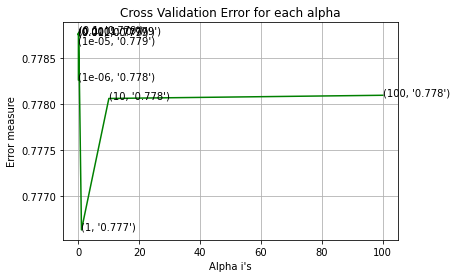

For values of best alpha =  1 The train log loss is: 0.6267508024831917
For values of best alpha =  1 The cross validation log loss is: 0.7766339142829835
For values of best alpha =  1 The test log loss is: 0.7228018328662179


In [29]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-RC")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [30]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.7766339142829835
Number of mis-classified points : 0.3692103147609919


<h3><font color='#235DA3'>Linear Support Vector Machines (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.619660340003693
for C = 0.0001
Log Loss : 0.6213390769135301
for C = 0.001
Log Loss : 0.6213357885430141
for C = 0.01
Log Loss : 0.6213651035178738
for C = 0.1
Log Loss : 0.8657041257544009
for C = 1
Log Loss : 0.8657041262516466
for C = 10
Log Loss : 0.8657041210001691
for C = 100
Log Loss : 0.865704122155681


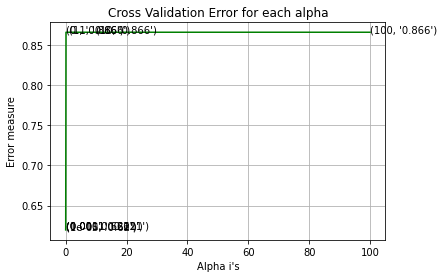

For values of best alpha =  1e-05 The train log loss is: 0.5866229754715498
For values of best alpha =  1e-05 The cross validation log loss is: 0.619660340003693
For values of best alpha =  1e-05 The test log loss is: 0.6070930846761455


In [31]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("SVM-OHE")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [32]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.619660340003693
Number of mis-classified points : 0.29772432131593596


<h3><font color='#235DA3'>Linear Support Vector Machines (with response)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.7784494385649663
for C = 0.0001
Log Loss : 0.7785791639454424
for C = 0.001
Log Loss : 0.7787085744038585
for C = 0.01
Log Loss : 0.7787162508222436
for C = 0.1
Log Loss : 0.7786595393603495
for C = 1
Log Loss : 0.7064294079746071
for C = 10
Log Loss : 0.7781002503951344
for C = 100
Log Loss : 0.7781020055913382


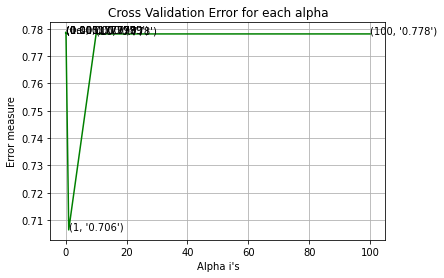

For values of best alpha =  1 The train log loss is: 0.6337500330905343
For values of best alpha =  1 The cross validation log loss is: 0.7064294079746071
For values of best alpha =  1 The test log loss is: 0.6820178434671406


In [33]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("Linear SVM-RC")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [34]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.7064294079746071
Number of mis-classified points : 0.3692103147609919


<h3><font color='#235DA3'>Random Forest Classifier(With One hot Encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [35]:
# alpha = [100,200,500,1000,2000]
# max_depth = [5, 10]
# cv_log_error_array = []
# for i in alpha:
#     for j in max_depth:
#         print("for n_estimators =", i,"and max depth = ", j)
#         clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
#         clf.fit(train_x_onehotCoding, train_y)
#         sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#         sig_clf.fit(train_x_onehotCoding, train_y)
#         sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
#         cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#         print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# best_alpha = np.argmin(cv_log_error_array)
# clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
# clf.fit(train_x_onehotCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_onehotCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_onehotCoding)
# RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
# predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
# RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
# predict_y = sig_clf.predict_proba(test_x_onehotCoding)
# RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

# #For Summary
# Model_name.append("Randpm Forest-OHE")
# train_losses_list.append(RF_tr)
# cv_losses_list.append(RF_cv)
# test_losses_list.append(RF_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [36]:
# clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
# missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
# misclassified_percentage.append(missclassified_p*100)

<h3><font color='#235DA3'>Random Forest Classifier(With response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [37]:
# max_depth = [5, 10]
# cv_log_error_array = []

# for j in max_depth:
#     print("for n_estimators =", i,"and max depth = ", j)
#     clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
#     clf.fit(train_x_responseCoding, train_y)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(train_x_responseCoding, train_y)
#     sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
#     cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#     print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# best_alpha = np.argmin(cv_log_error_array)
# clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=max_depth[best_alpha], random_state=42, n_jobs=-1)
# clf.fit(train_x_responseCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_responseCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_responseCoding)
# RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
# predict_y = sig_clf.predict_proba(cv_x_responseCoding)
# RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
# predict_y = sig_clf.predict_proba(test_x_responseCoding)
# RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

# #For Summary
# Model_name.append("Randpm Forest-RC")
# train_losses_list.append(RF_tr)
# cv_losses_list.append(RF_cv)
# test_losses_list.append(RF_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [38]:
# clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=max_depth[best_alpha], random_state=42, n_jobs=-1)
# missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
# misclassified_percentage.append(missclassified_p*100)

# With class balancing

<h3><font color='#235DA3'>Logistic Regression (with one hot encoding)</font></h3>

In [39]:
from sklearn.linear_model import SGDClassifier

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.6098577564779512
for alpha = 1e-05
Log Loss : 0.6133774830887594
for alpha = 0.0001
Log Loss : 0.6151690919435009
for alpha = 0.001
Log Loss : 0.6154972749189076
for alpha = 0.01
Log Loss : 0.6151998151907959
for alpha = 0.1
Log Loss : 0.6149872945576247
for alpha = 1
Log Loss : 0.6152298453644263
for alpha = 10
Log Loss : 0.6153900782935112
for alpha = 100
Log Loss : 0.6154627394740114


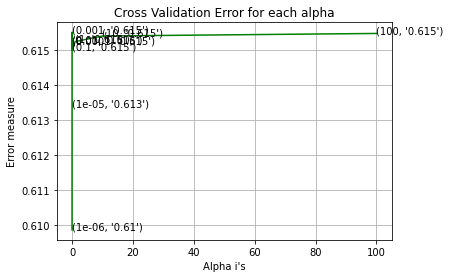

For values of best alpha =  1e-06 The train log loss is: 0.5517381279767476
For values of best alpha =  1e-06 The cross validation log loss is: 0.6098577564779512
For values of best alpha =  1e-06 The test log loss is: 0.5899009406437078


In [40]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-OHE (with class_balancing)")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [41]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.6098577564779512
Number of mis-classified points : 0.2824655247047183


<h3><font color='#235DA3'>Logistic Regression (with response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for alpha = 1e-06
Log Loss : 0.7781516434912268
for alpha = 1e-05
Log Loss : 0.7785775776385476
for alpha = 0.0001
Log Loss : 0.778765122437281
for alpha = 0.001
Log Loss : 0.7787478115081315
for alpha = 0.01
Log Loss : 0.778753242222464
for alpha = 0.1
Log Loss : 0.778744350379555
for alpha = 1
Log Loss : 0.7783589879885852
for alpha = 10
Log Loss : 0.7781752533751767
for alpha = 100
Log Loss : 0.778192445694455


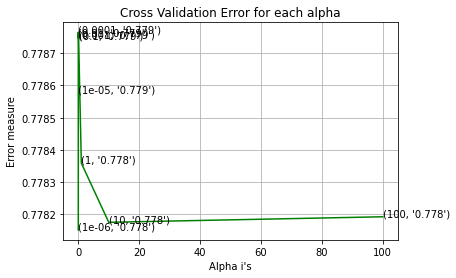

For values of best alpha =  1e-06 The train log loss is: 0.6265455717176693
For values of best alpha =  1e-06 The cross validation log loss is: 0.7781516434912268
For values of best alpha =  1e-06 The test log loss is: 0.7238600492469337


In [42]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
LR_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:", LR_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
LR_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:", LR_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
LR_test = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", LR_test)

#For Summary
Model_name.append("Logistic Regresion-RC (with class_balancing)")
train_losses_list.append(LR_tr)
cv_losses_list.append(LR_cv)
test_losses_list.append(LR_test)

<h4><font color='#82ADCB'>Testing the model with best hyper paramters</font></h4>

In [43]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.7781516434912268
Number of mis-classified points : 0.3692103147609919


<h3><font color='#235DA3'>Linear Support Vector Machines (with one hot encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.6181441786944876
for C = 0.0001
Log Loss : 0.6155338849638095
for C = 0.001
Log Loss : 0.6155408197369094
for C = 0.01
Log Loss : 0.6155418652206802
for C = 0.1
Log Loss : 0.6155418653173673
for C = 1
Log Loss : 0.6155418654424558
for C = 10
Log Loss : 0.6155418649413541
for C = 100
Log Loss : 0.615541864146315


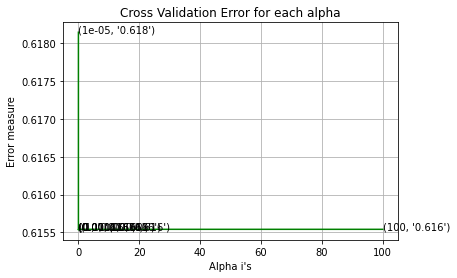

For values of best alpha =  0.0001 The train log loss is: 0.568871317460526
For values of best alpha =  0.0001 The cross validation log loss is: 0.6155338849638095
For values of best alpha =  0.0001 The test log loss is: 0.5988891126343089


In [44]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(class_weight='balanced',alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("SVM-OHE (with class_balancing)")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [45]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.6155338849638095
Number of mis-classified points : 0.28925236534537135


<h3><font color='#235DA3'>Linear Support Vector Machines (with response)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

for C = 1e-05
Log Loss : 0.7784494385649663
for C = 0.0001
Log Loss : 0.7785791639454424
for C = 0.001
Log Loss : 0.7787085744038585
for C = 0.01
Log Loss : 0.7787162508222436
for C = 0.1
Log Loss : 0.7786595393603495
for C = 1
Log Loss : 0.7064294079746071
for C = 10
Log Loss : 0.7781002503951344
for C = 100
Log Loss : 0.7781020055913382


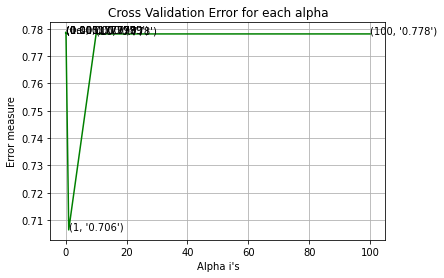

For values of best alpha =  1 The train log loss is: 0.6337500330905343
For values of best alpha =  1 The cross validation log loss is: 0.7064294079746071
For values of best alpha =  1 The test log loss is: 0.6820178434671406


In [46]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_responseCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
SVM_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",SVM_tr)
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
SVM_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",SVM_cv)
predict_y = sig_clf.predict_proba(test_x_responseCoding)
SVM_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:", SVM_te)
#For Summary
Model_name.append("Linear SVM-RC (with class_balancing)")
train_losses_list.append(SVM_tr)
cv_losses_list.append(SVM_cv)
test_losses_list.append(SVM_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters</font></h4>

In [47]:
clf = SGDClassifier(class_weight='balanced',alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)
misclassified_percentage.append(missclassified_p*100)

Log loss : 0.778745610064188
Number of mis-classified points : 0.3692103147609919


In [48]:
from sklearn.ensemble import RandomForestClassifier

<h3><font color='#235DA3'>Random Forest Classifier(With One hot Encoding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [49]:
# alpha = [100,200,500,1000,2000]
# max_depth = [5, 10]
# cv_log_error_array = []
# # cls_weight = {1:1/9, 2:1/9, 3:1/9, 4:1/9, 5:1/9, 6:1/9, 7:1/9, 8:1/9, 9:1/9}
# for i in alpha:
#     for j in max_depth:
#         print("for n_estimators =", i,"and max depth = ", j)
#         clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1, class_weight='balanced')
#         clf.fit(train_x_onehotCoding, train_y)
#         sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#         sig_clf.fit(train_x_onehotCoding, train_y)
#         sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
#         cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#         print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# best_alpha = np.argmin(cv_log_error_array)
# clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
# clf.fit(train_x_onehotCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_onehotCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_onehotCoding)
# RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
# predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
# RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
# predict_y = sig_clf.predict_proba(test_x_onehotCoding)
# RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

# #For Summary
# Model_name.append("Randpm Forest-OHE (with class_balancing)")
# train_losses_list.append(RF_tr)
# cv_losses_list.append(RF_cv)
# test_losses_list.append(RF_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [50]:
# clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
# missclassified_p = predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)
# misclassified_percentage.append(missclassified_p*100)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [51]:
# def get_impfeature_names(indices, text, gene, var, no_features):
#     gene_count_vec = TfidfVectorizer(max_features=1000)
#     var_count_vec = TfidfVectorizer(max_features=1000)
#     text_count_vec = TfidfVectorizer(max_features=1000)

#     gene_vec = gene_count_vec.fit(train_df['Gene'])
#     var_vec = var_count_vec.fit(train_df['Variation'])
#     text_vec = text_count_vec.fit(train_df['TEXT'])

#     fea1_len = len(gene_vec.get_feature_names())
#     fea2_len = len(var_count_vec.get_feature_names())

#     word_present = 0
#     for i, v in enumerate(indices):
#         if (v < fea1_len):
#             word = gene_vec.get_feature_names()[v]
#             yes_no = True if word == gene else False
#             if yes_no:
#                 word_present += 1
#                 print(i, "Gene feature [{}] present in test data point [{}]".format(word, yes_no))
#         elif (v < fea1_len + fea2_len):
#             word = var_vec.get_feature_names()[v - (fea1_len)]
#             yes_no = True if word == var else False
#             if yes_no:
#                 word_present += 1
#                 print(i, "variation feature [{}] present in test data point [{}]".format(word, yes_no))
#         else:
#             word = text_vec.get_feature_names()[v - (fea1_len + fea2_len)]
#             yes_no = True if word in text.split() else False
#             if yes_no:
#                 word_present += 1
#                 print(i, "Text feature [{}] present in test data point [{}]".format(word, yes_no))

#     print("Out of the top ", no_features, " features ", word_present, "are present in query point")

In [52]:
# # test_point_index = 10
# clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1,class_weight='balanced')
# clf.fit(train_x_onehotCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_onehotCoding, train_y)

# test_point_index = 1
# no_feature = 100
# predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
# print("Predicted Class :", predicted_cls[0])
# print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
# print("Actual Class :", test_y[test_point_index])
# indices = np.argsort(-clf.feature_importances_)
# print("-"*50)
# get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [53]:
# test_point_index = 100
# no_feature = 100
# predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
# print("Predicted Class :", predicted_cls[0])
# print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
# print("Actuall Class :", test_y[test_point_index])
# indices = np.argsort(-clf.feature_importances_)
# print("-"*50)
# get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

<h3><font color='#235DA3'>Random Forest Classifier(With response coding)</font></h3>

<h4><font color='#82ADCB'>Hyper parameter tuning</font></h4>

In [54]:
# max_depth = [5, 10]
# cv_log_error_array = []

# for j in max_depth:
#     print("for n_estimators =", i,"and max depth = ", j)
#     clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=j, random_state=42, n_jobs=-1,class_weight='balanced')
#     clf.fit(train_x_responseCoding, train_y)
#     sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#     sig_clf.fit(train_x_responseCoding, train_y)
#     sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
#     cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#     print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# best_alpha = np.argmin(cv_log_error_array)
# clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=max_depth[best_alpha], random_state=42, n_jobs=-1,class_weight='balanced')
# clf.fit(train_x_responseCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_responseCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_responseCoding)
# RF_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",RF_tr)
# predict_y = sig_clf.predict_proba(cv_x_responseCoding)
# RF_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",RF_cv)
# predict_y = sig_clf.predict_proba(test_x_responseCoding)
# RF_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",RF_te)

# #For Summary
# Model_name.append("Randpm Forest-RC")
# train_losses_list.append(RF_tr)
# cv_losses_list.append(RF_cv)
# test_losses_list.append(RF_te)

<h4><font color='#82ADCB'>Testing model with best hyper parameters (One Hot Encoding)</font></h4>

In [55]:
# clf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=max_depth[best_alpha], random_state=42, n_jobs=-1,class_weight='balanced')
# missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
# misclassified_percentage.append(missclassified_p*100)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

<h3><font color='#235DA3'>XGBoost(With response coding)</font></h3>

In [56]:
# from xgboost import XGBClassifier
# # alpha = [100, 500, 700]
# max_depth =  [3, 6 ]
# cv_log_error_array = []

# for j in max_depth:
# #             print("for n_estimators =", i,"and max depth = ", j)
#         clf = XGBClassifier(n_estimators=600, objective='binary:logistic' , max_depth=j, random_state=42, eval_metric='logloss')
#         clf.fit(train_x_responseCoding, train_y)
#         sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
#         sig_clf.fit(train_x_responseCoding, train_y)
#         sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
#         cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
#         print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

# best_alpha = np.argmin(cv_log_error_array)
# clf = XGBClassifier(n_estimators=600, objective='binary:logistic', max_depth=max_depth[best_alpha], random_state=42, eval_metric='logloss')
# clf.fit(train_x_responseCoding, train_y)
# sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
# sig_clf.fit(train_x_responseCoding, train_y)

# predict_y = sig_clf.predict_proba(train_x_responseCoding)
# xgboost_tr = log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",xgboost_tr)
# predict_y = sig_clf.predict_proba(cv_x_responseCoding)
# xgboost_cv = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",xgboost_cv)
# predict_y = sig_clf.predict_proba(test_x_responseCoding)
# xgboost_te = log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15)
# print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",xgboost_te)

# #For Summary
# Model_name.append("XGBoost-RC")
# train_losses_list.append(xgboost_tr)
# cv_losses_list.append(xgboost_cv)
# test_losses_list.append(xgboost_te)

In [57]:
# clf = XGBClassifier(n_estimators=600, objective='binary:logistic', max_depth=max_depth[best_alpha], random_state=42, eval_metric='logloss')
# missclassified_p = predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf, 1)
# misclassified_percentage.append(missclassified_p*100)

<h2><font color='#40B5C4'>Summary </font></h2>

In [58]:
from texttable import Texttable
#https://www.educative.io/edpresso/print-a-table-in-python
# texttable takes the first reocrd in the list as the column names
# of the table
l = [['Models', 'train_log_loss', 'cv_log_loss', 'test_log_loss', '%_misclassified']]
for i in range(len(Model_name)):
    new_record = []
    new_record.append(Model_name[i])
    new_record.append(train_losses_list[i])
    new_record.append(cv_losses_list[i])
    new_record.append(test_losses_list[i])
    new_record.append(misclassified_percentage[i])
    l.append(new_record)
    

# table = tabulate(l, headers=, tablefmt='orgtbl')


table = Texttable()
table.add_rows(l)
print(table.draw())

+----------------+---------------+-------------+---------------+---------------+
|     Models     | train_log_los | cv_log_loss | test_log_loss | %_misclassifi |
|                |       s       |             |               |      ed       |
+================+===============+=============+===============+===============+
| MultinomialNB- | 0.579         | 0.616       | 0.602         | 29.451        |
| OHE            |               |             |               |               |
+----------------+---------------+-------------+---------------+---------------+
| MultinomialNB- | 0.637         | 0.727       | 0.694         | 36.921        |
| RC             |               |             |               |               |
+----------------+---------------+-------------+---------------+---------------+
| Logistic       | 0.552         | 0.610       | 0.590         | 28.248        |
| Regresion-OHE  |               |             |               |               |
+----------------+----------